In [10]:
import numpy as np, pandas as pd
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

tl = Table.read_table("TL_with_dist_10_10_JamesEdits.csv")

In [2]:
tl

Site,Participant_ID,Q69,Date_bound_lower,Date_bound_upper,Trip_number,Trip_ID,Q2_1,Q2_2,Q2_3,Q3,Q3_1_TEXT,Q3_2_TEXT,Q65,Q5_1,Q5_2,Q5_3,Q10,Q10_9_TEXT,Q6,Q6_1_TEXT,Q6_2_TEXT,Q7,Q7_7_TEXT,Q8,State,Origin_Latitude,Origin_Longitude,Origin_Accuracy Score,Origin_Accuracy Type,Origin_Number,Origin_Street,Origin_City,Origin_State,Origin_County,Origin_Zip,Origin_Country,Origin_Source,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,City,State.1,County,Zip,Country,Source,TOD?,Placetype,on e-mission server,Date onboarded,Time onboarded,GSR,RA onboarded,Installed App? (y/n),Onboarding notes,Offboarded? (1 = yes),Date offboarded,Time offboarded,GSR.1,RA offboarded,Downloaded app data?,Offboarding notes,GSR Lead,Carol has contact?,Status,Within Half Mile of HQT? (TOD?),PDX Place Type,Lat,Long,Notes,Contact Name,Phone # or email,City_2,Units with Subsidy,PIS,Management Company,Developer,Community room we can use?,Wifi?,Language Needs,Total # Participants,Double Check Participants_Survey,Travel Log Total,GSR Survey Lead,Survey completed?,Outreach touch point 1,Outreach touch point 2,Outreach touch point 3,Notes.1,Drove_Alone,Drove_Share,Bus,Train,Shuttle,Walk,Bike,Taxi/Uber/Lyft,Transit,Drove_all,Vehicle,Home,Work,Education,Shopping,Meal,Personal/Medical,Social/Recreational,Pick_up_drop_off,URL,Distance
Alta Mira,Alta1,4/4/2018,nan,nan,1,210,Alta Mira,28939 Mission Blvd.,Hayward,PM:,nan,4:00,nan,GSO (work),4601 Malat St,Oakland,Work,nan,PM:,nan,6:00,"Bus,Train",nan,0,CA,37.6351,-122.053,1,rooftop,28939,Mission Blvd,Hayward,CA,Alameda County,94544,US,City of Hayward and Fairview. Licensed for Public Use,37.7648,-122.221,1,rooftop,4601,Malat St,Oakland,CA,Alameda County,94601,US,Alameda County,1,Urban Neighborhood,0,30-Mar,3:30-5:30PM,James,nan,N,nan,1,4/6/2018,3:30-5pm,Rebecca,Juan,nan,nan,James/Rebecca,nan,Data Collection scheduled for 3/30,Yes,Urban Neighborhood,37.6349,-122.054,nan,nan,shira.goldsmith@edenhousing.org,nan,150,nan,nan,Eden,nan,nan,nan,10,10,nan,Rebecca,Y,16-Apr,nan,nan,nan,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,https://maps.googleapis.com/maps/api/distancematrix/json ...,23.8
Alta Mira,Alta1,4/4/2018,nan,nan,2,499,GSO (work),4601 Malat St,Oakland,PM:,nan,10:00,nan,Alta Mira,28939 Mission Blvd.,Hayward,Home,nan,AM:,10:45,nan,"Bus,Train",nan,0,CA,37.7648,-122.221,1,rooftop,4601,Malat St,Oakland,CA,Alameda County,94601,US,Alameda County,37.6351,-122.053,1,rooftop,28939,Mission Blvd,Hayward,CA,Alameda County,94544,US,City of Hayward and Fairview. Licensed for Public Use,1,Urban Neighborhood,0,30-Mar,3:30-5:30PM,James,nan,N,nan,1,4/6/2018,3:30-5pm,Rebecca,Juan,nan,nan,James/Rebecca,nan,Data Collection scheduled for 3/30,Yes,Urban Neighborhood,37.6349,-122.054,nan,nan,shira.goldsmith@edenhousing.org,nan,150,nan,nan,Eden,nan,nan,nan,10,10,nan,Rebecca,Y,16-Apr,nan,nan,nan,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,https://maps.googleapis.com/maps/api/distancematrix/json ...,23.8
Alta Mira,Dn22QF,3/31/2018,nan,nan,1,214,Home,28939 mission Blv,Hayward,PM:,nan,4:23,nan,nan,Holly St and 96th St,Oakland,Social/Recreational,nan,PM:,nan,4:48,Drove alone,nan,4,CA,37.6346,-122.053,1,rooftop,28939,Mission Bl,Hayward,CA,Alameda County,94544,US,Alameda County,37.7463,-122.17,1,intersection,nan,96th Ave,Oakland,CA,Alameda County,94603,US,TIGER/Line® dataset from the US Census Bureau,1,Urban Neighborhood,1,30-Mar,3:30-5:30PM,James,nan,N,nan,1,4/6/2018,3:30-5pm,Rebecca,Jenny,nan,nan,James/Rebecca,nan,Data Collection scheduled for 3/30,Yes,Urban Neighborhood,37.6349,-122.054,nan,nan,shira.goldsmith@edenhousing.org,nan,150,nan,nan,Eden,nan,nan,nan,10,10,nan,Rebecca,Y,16-Apr,nan,nan,nan,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,https://maps.googleapis.com/maps/api/distancematrix/json ...,19
Alta Mira,LapWx5,5/4/2018,nan,nan,1,206,Home,28939 Mission Blvd,Hayward,AM:,8,nan,nan,Global Supply,20628 Corsair bld,Hayward,Work,nan,AM:,8:15,nan,Drove alone,nan,0,CA,37.6351,-122.053,1,rooftop,28939,Mission Blvd,Hayward,CA,Alameda County,94544,US,City of Hayw

In [33]:
from pylab import figure, axes, pie, title, show

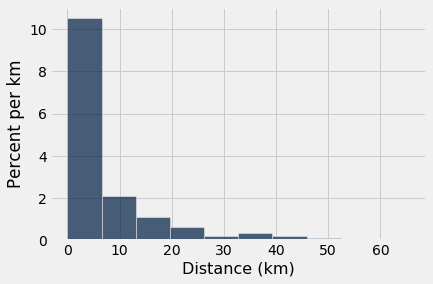

In [36]:
tl.where('Distance',are.below(9999)).hist('Distance', unit='km')
plt.savefig('TLog_Dist_histogram.png')

In [14]:
# Mean Distance
np.mean(tl.where('Distance',are.below(9999)).column('Distance'))

7.223101460415066

In [15]:
# Number of participants
tl.group('Participant_ID').num_rows

294

In [17]:
# Average number of trips per participant
tl.num_rows/tl.group('Participant_ID').num_rows

4.554421768707483

In [18]:
tl.group('Q7').sort(1,descending=True)

Q7,count
Drove alone,611
Walk,237
Shared ride,203
Bus,98
Train,35
"Walk,Bus",32
nan,29
"Bus,Train",18
Other:,16
"Walk,Bus,Train",12


In [19]:
tl.group('Q10').sort(1,descending=True)

Q10,count
Home,408
Shopping,198
Pick-up/drop-off,176
Personal/Medical,104
Work,98
Social/Recreational,69
Education,63
Meal,53
nan,20
"Education,Pick-up/drop-off",20


In [23]:
tl.where('Q10','Work').group('Q7').sort(1,descending=True)

Q7,count
Drove alone,61
Walk,17
Bus,7
Shared ride,4
Train,3
"Bus,Train",3
"Walk,Bus,Train",2
Taxi/Uber/Lyft,1


In [25]:
# Average distance by site
tl.where('Distance', are.below(9999)).group(0,np.mean).select('Site','Distance mean').sort(1,descending=True).show(27)

Site,Distance mean
Santa Cecilia,13.307
Riverwood Grove,13.029
Alta Mira,12.2205
Belmont,11.4323
MacArthur Park,10.414
Oroysom Village,9.80385
Camellia Place,8.8125
Eden Baywood,8.55238
Mandela Gateway,8.22979
Station Center,8.1


In [31]:
#Average distance by placetype
tl.where('Distance', are.below(9999)).group('Placetype',np.mean).select(0,'Distance mean').sort(1,descending=True)

Placetype,Distance mean
Suburban Neighborhood,7.58448
Urban Neighborhood,7.39755
Urban District,7.17771
Urban Core,6.62479
